# "*Parks and Recreations*" selected food words 

This notebook visualizes selected food words from the TV show ["*Parks and Recreations*"](https://en.wikipedia.org/wiki/Parks_and_Recreation).

Source code: <https://codeberg.org/penguinsfly/tv-mania/src/branch/main/pandr>

## Motivation

Why? Cuz the *calzones* ...

Well, some foods are unusually used more than normal in the show, *calzones* being of them (from Ben), and of course *waffles* from Leslie.

This manually selects the following words to count from the show transcripts:

- calzone
- pancake
- waffle
- pizza
- steak
- beef
- burger
- pie

You could already guess that `calzone` & `pizza` were chosen because of Ben, `pancake` & `waffle` cuz of Leslie and `steak` & `beef` cuz of Ron

## Obtain data

The data file `parks-and-recreation_scripts.csv` was obtained using  [`sf2`](https://codeberg.org/penguinsfly/springfield-scraper) that downloaded the scripts from [Springfield! Springfield!](https://www.springfieldspringfield.co.uk).

```bash
sf2 --show "parks-and-recreation" --format csv
```

## Import modules

In [1]:
import re

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

from wordfreq import word_frequency
from statsmodels.stats.proportion import proportions_ztest

In [2]:
# plot configs
rcParams['font.family'] = 'Overpass Nerd Font'
rcParams['font.size'] = 18
rcParams['axes.titlesize'] = 20
rcParams['axes.labelsize'] = 18
rcParams['axes.linewidth'] = 1.5
rcParams['lines.linewidth'] = 1.5
rcParams['lines.markersize'] = 20
rcParams['patch.linewidth'] = 1.5
rcParams['xtick.labelsize'] = 18
rcParams['ytick.labelsize'] = 18
rcParams['xtick.major.width'] = 2
rcParams['xtick.minor.width'] = 2
rcParams['ytick.major.width'] = 2
rcParams['ytick.minor.width'] = 2
rcParams['savefig.dpi'] = 300
rcParams['savefig.transparent'] = False
rcParams['savefig.facecolor'] = 'white'
rcParams['savefig.format'] = 'svg'
rcParams['savefig.pad_inches'] = 0.5
rcParams['savefig.bbox'] = 'tight'

## Load scripts & count words

In [3]:
data_path = 'parks-and-recreation_scripts.csv'

In [4]:
words = [
    'calzone', 'pancake', 'waffle', 'pizza', 
    'steak', 'beef', 'burger', 'pie',
]

### Count words from data

In [5]:
def count_words(df, words):
    script = re.sub('[^A-Za-z0-9]+', ' ', df['script']).lower()
    df['total_count'] = len(script.split())    
    script = script.split('\n')
    num_lines = len(script)
    df['norm_lino'] = np.arange(num_lines)/num_lines
    
    for w in words:
        out_w = np.full(num_lines, fill_value=0)
        for lino, line in enumerate(script):
            out_w[lino] = len([x for x in line.split() if x==w or x==w+'s'])
        df[w + '_series'] = out_w
        df[w + '_count'] = sum(out_w)
        
    return df

In [6]:
script_df = pd.read_csv(data_path, index_col=None)
script_df = script_df.apply(lambda df: count_words(df, words), axis=1)

In [7]:
script_df

id_text                  show  season  \
0    Parks and Recreation s01e01 Episode Script  Parks and Recreation       1   
1    Parks and Recreation s01e02 Episode Script  Parks and Recreation       1   
2    Parks and Recreation s01e03 Episode Script  Parks and Recreation       1   
3    Parks and Recreation s01e04 Episode Script  Parks and Recreation       1   
4    Parks and Recreation s01e05 Episode Script  Parks and Recreation       1   
..                                          ...                   ...     ...   
117  Parks and Recreation s07e08 Episode Script  Parks and Recreation       7   
118  Parks and Recreation s07e09 Episode Script  Parks and Recreation       7   
119  Parks and Recreation s07e10 Episode Script  Parks and Recreation       7   
120  Parks and Recreation s07e11 Episode Script  Parks and Recreation       7   
121  Parks and Recreation s07e12 Episode Script  Parks and Recreation       7   

     episode                                      episode_title  \
0          1                                      CHE01 - Pilot   
1          2                                 CHE03 - Canvassing   
2          3                                 102 - The Reporter   
3          4                                 CHE04 - Boys' Club   
4          5                                CHE05 - The Banquet   
..       ...                                                ...   
117        8               Ms. Ludgate-Dwyer Goes to Washington   
118        9                                           Pie-Mary   
119       10  The Johnny Karate Super Awesome Musical Explos...   
120       11                                       Two Funerals   
121       12                          One Last Ride, Part 1 & 2   

                                                script  \
0    Hello.\nHi.\nMy name is Leslie Knope, and I wo...   
1    LESLIE Well, one of the funner things that we ...   
2    Okay, now, see, here's a good example of a pla...   
3    TOM So, we've been called out to this hiking t...   
4    In a town as old as Pawnee, there's a lot of h...   
..                                                 ...   
117  Okay.\nSo, the central question that these sen...   
118  We need to go over the schedule leading up to ...   
119  It's the Johnny Karate Super Awesome Musical E...   
120  Hey.\nHey, guys.\nListen.\nUh, Leslie's gonna ...   
121  Which brings us to 2005.\nThe Circle Park reno...   

                                                   url  total_count norm_lino  \
0    https://www.springfieldspringfield.co.uk/view_...         3250     [0.0]   
1    https://www.springfieldspringfield.co.uk/view_...         3561     [0.0]   
2    https://www.springfieldspringfield.co.uk/view_...         3380     [0.0]   
3    https://www.springfieldspringfield.co.uk/view_...         3337     [0.0]   
4    https://www.springfieldspringfield.co.uk/view_...         3530     [0.0]   
..                                                 ...          ...       ...   
117  https://www.springfieldspringfield.co.uk/view_...         3915     [0.0]   
118  https://www.springfieldspringfield.co.uk/view_...         3700     [0.0]   
119  https://www.springfieldspringfield.co.uk/view_...         3121     [0.0]   
120  https://www.springfieldspringfield.co.uk/view_...         3531     [0.0]   
121  https://www.springfieldspringfield.co.uk/view_...         6789     [0.0]   

    calzone_series  ...  pizza_series pizza_count  steak_series steak_count  \
0              [0]  ...           [0]           0           [0]           0   
1              [0]  ...           [0]           0           [0]           0   
2              [0]  ...           [0]           0           [0]           0   
3              [0]  ...           [0]           0           [0]           0   
4              [0]  ...           [0]           0           [0]           0   
..             ...  ...           ...         ...           ...         ...   
117            [0]  ...           [0]  

### Compare data frequency to [`rspeer/wordfreq`](https://github.com/rspeer/wordfreq)

This attemps to establish how uncommon these selected words are

The base frequencies are from using [`rspeer/wordfreq`](https://github.com/rspeer/wordfreq).

Higher ratios between `script_freq` and `base_freq` means such words are unusually higher than expected. 

No additional comparisons or corrections are done, so take these numbers with a grain of salt.  

In [8]:
script_word_count = script_df.filter(regex='.*count').rename(columns=lambda c: c.replace('_count', '')).sum(axis=0)
total_word_count = script_word_count.pop('total')
script_word_freq = script_word_count / total_word_count

word_freq_df = pd.DataFrame({
    'script_freq': script_word_freq, 
    'base_freq': {w: word_frequency(w, 'en') for w in words},
    'script_count': script_word_count,
})

word_freq_df['ratio'] = word_freq_df['script_freq'] / word_freq_df['base_freq']
word_freq_df['log_ratio'] = np.log10(word_freq_df['ratio'])

word_freq_df = word_freq_df.join(pd.json_normalize(word_freq_df.apply(
    lambda x: dict(zip(
        ('z_stat','p_val'),
        proportions_ztest(x['script_count'], total_word_count, x['base_freq'], alternative='larger')
    )),
    axis=1
)).set_index(word_freq_df.index))

word_freq_df = word_freq_df.reset_index().rename(columns={'index': 'word'})
word_freq_df = word_freq_df.sort_values(by=['ratio'], ascending=[False]).reset_index(drop=True)

In [9]:
word_freq_df

word  script_freq     base_freq  script_count       ratio  log_ratio  \
0  calzone     0.000058  1.580000e-07            26  368.541199   2.566486   
1   waffle     0.000123  2.000000e-06            55   61.588904   1.789502   
2  pancake     0.000029  2.240000e-06            13   12.997658   1.113865   
3   burger     0.000096  1.170000e-05            43    8.230996   0.915452   
4    steak     0.000054  9.330000e-06            24    5.761020   0.760499   
5    pizza     0.000150  2.690000e-05            67    5.578177   0.746492   
6      pie     0.000076  1.550000e-05            34    4.912663   0.691317   
7     beef     0.000025  1.950000e-05            11    1.263362   0.101528   

     z_stat         p_val  
0  5.085332  1.834919e-07  
1  7.296233  1.479677e-13  
2  3.328200  4.370460e-04  
3  5.761040  4.179868e-09  
4  4.048722  2.574908e-05  
5  6.718468  9.182227e-12  
6  4.644206  1.706934e-06  
7  0.691396  2.446582e-01

## Visualize results

### Counts of words throughout the show

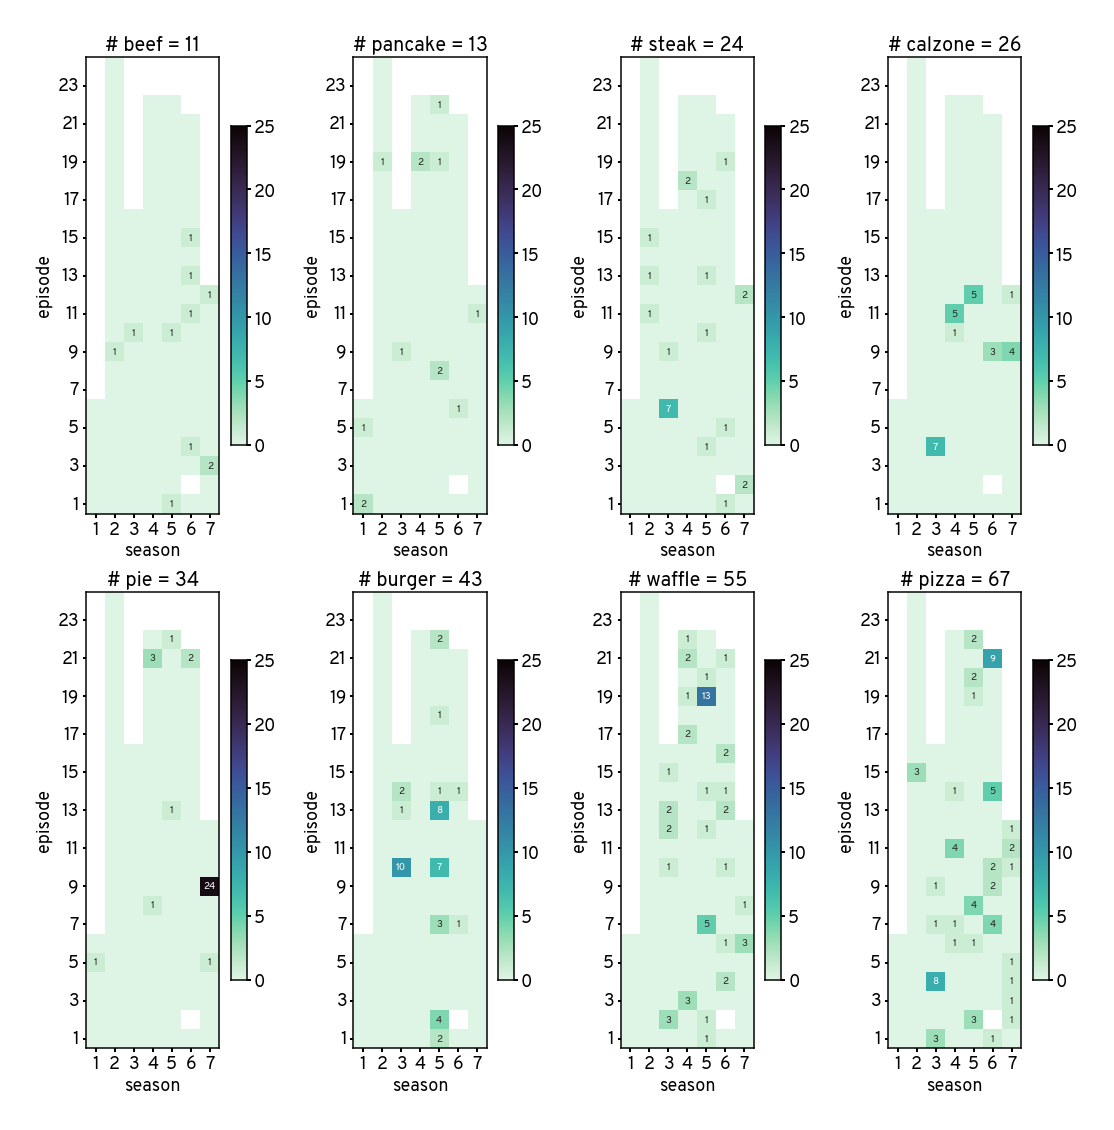

In [10]:
plt.figure(figsize=(15,15))

num_words = len(words)
sel_words = word_freq_df.sort_values('script_count').word.to_list()

for i, w in enumerate(sel_words):
    w_df = script_df.pivot(
        index='episode', 
        columns='season', 
        values=w + '_count'
    )
    w_total = np.nansum(w_df.to_numpy())
    plt.subplot(2,4,i+1)     
    
    sns.heatmap(
        w_df, 
        square=True,
        cmap='mako_r',
        vmin = 0,
        vmax = 25,
        fmt = 's',
        annot = w_df.fillna(0).astype(int).replace(0, '').astype(str),
        cbar_kws={'shrink':0.7}
    )
    plt.title(f'# {w} = {int(w_total)}') 
    plt.gca().invert_yaxis()
    plt.yticks(rotation=0)

sns.despine(right=False, top=False)

plt.tight_layout()

# plt.savefig('figures/word_cnt_mat.svg')


### How are these words?

Remember higher means more unusually high, e.g. `calzone` was used about 350 times more frequently than expected.

Anyone who has watched the show can atest to this lol. 

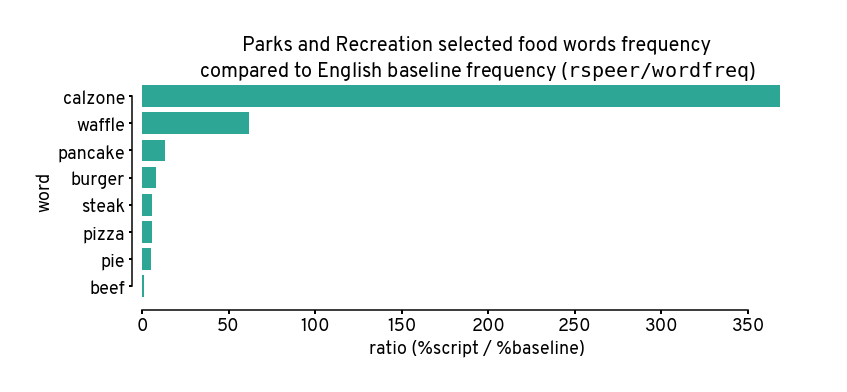

In [11]:
plt.figure(figsize=(12,4))
sns.barplot(
    data=word_freq_df, 
    y='word',
    x='ratio',
    color=(0,0.7,0.61), 
    alpha=0.9,
    errorbar=None,
)
plt.xlabel('ratio (%script / %baseline)')
plt.title('Parks and Recreation selected food words frequency\n'\
          'compared to English baseline frequency ($\mathtt{rspeer/wordfreq}$)')
sns.despine(trim=True, ax=plt.gca(), offset=10)

# plt.savefig('figures/compared_to_baseline.svg')


## Putting it all together w/ annotations

I put those 2 figures together in Inkscape with some annotations for the final presentatiton 

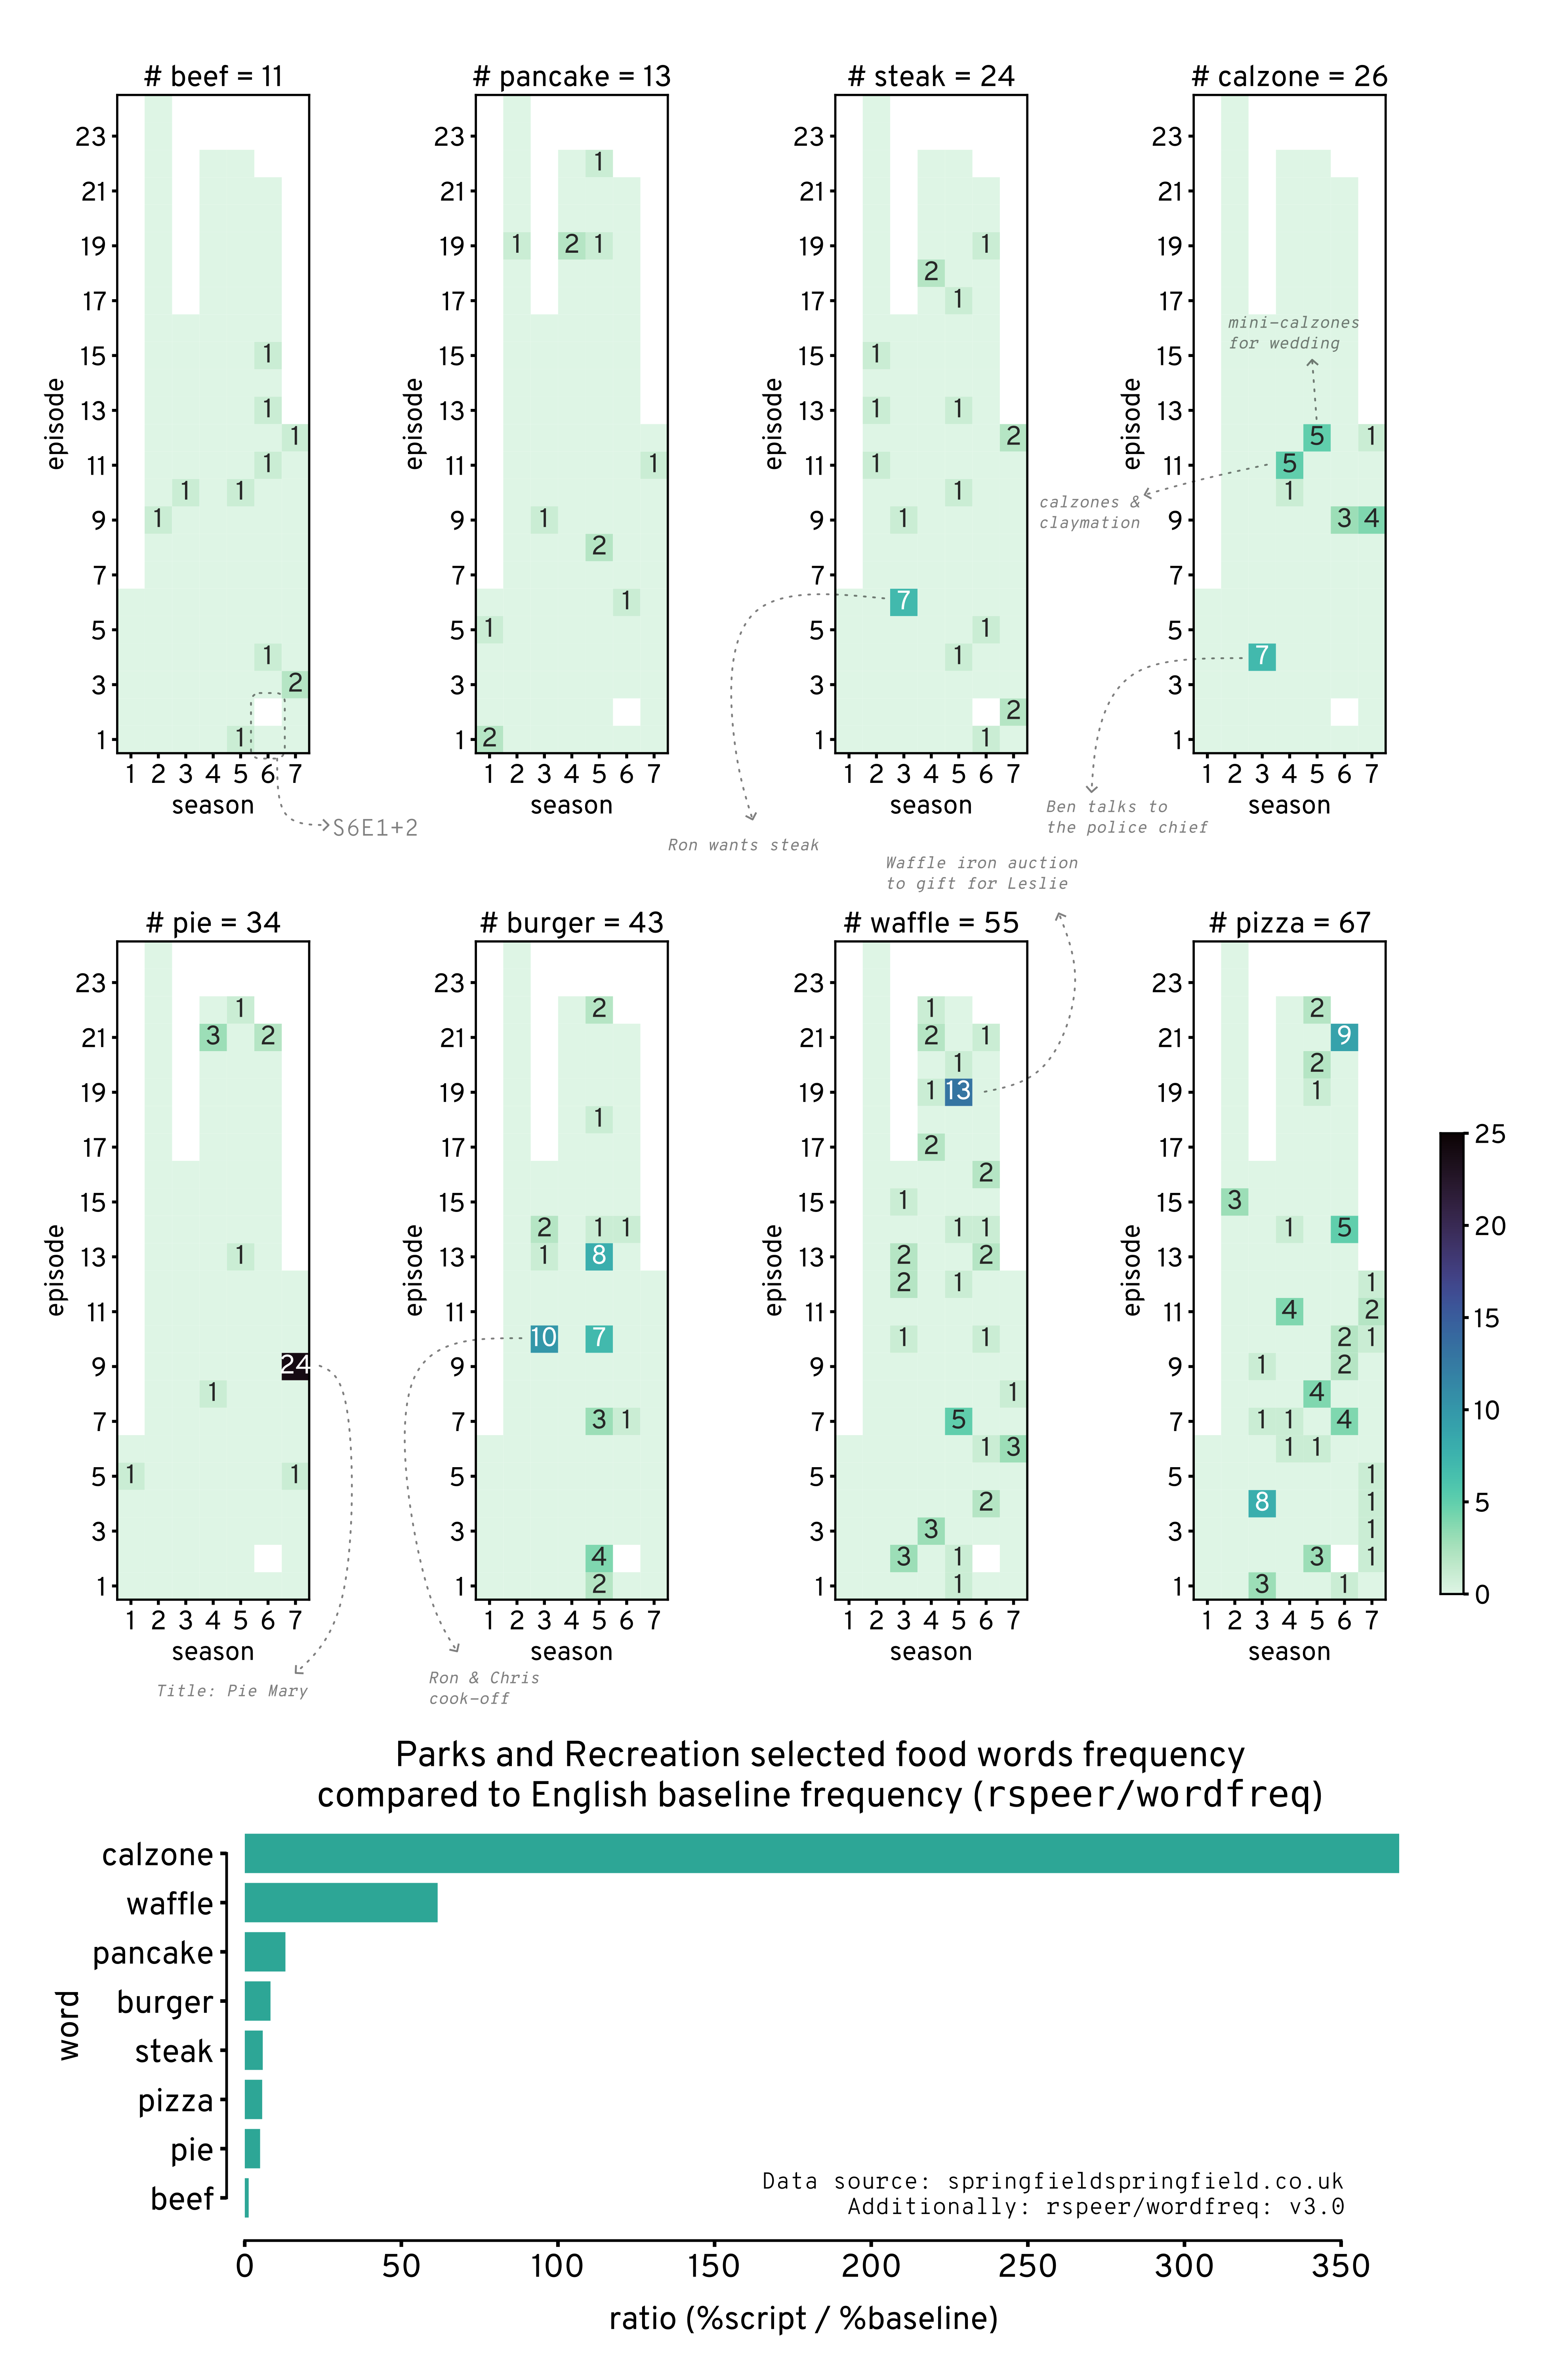

In [12]:
from IPython.display import Image, display
display(Image(filename='figures/pandr-foods.png'))